# Temporal association in assymetric neural networks
This is an attempt to reproduce this paper.

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.57.2861

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

Let's first create some random pattenrs with 1 and -1

In [153]:
n_network = 500  # The size of the network
n_patterns = 10
n_sequence = 10
l = 2.5

patterns_to_store = np.random.choice([-1, 1], size=(n_patterns, n_network), replace=True)

Let's build the connectivity matrices

In [154]:
J1 = np.zeros((n_network, n_network))

for pattern in patterns_to_store:
    J1 += np.outer(pattern, pattern)
    
J1 /= n_network

In [155]:
J2 = np.zeros((n_network, n_network))
for index in range(n_patterns - 1):
    J2 += np.outer(patterns_to_store[index + 1], patterns_to_store[index])
    
J2 *= (l / n_network)

Now let's make the system evolve

In [174]:
T = 50
tau = 8
S_initial = np.array([patterns_to_store[0] for i in range(tau)])
S_aux = np.zeros((T, n_network))
S = np.vstack((S_initial, S_aux))

for t in range(tau, T + tau - 1):
    h1 = J1 @ S[t, :]
    S_avg = (1 / tau) * S[(t - tau):t, :].sum(axis=0)
    h2 = J2 @ S_avg
    S[t + 1, :] = np.sign(h1 + h2)

Now we need to calculate the overlaps to see the evolution of the system.

In [177]:
m = np.zeros(((tau + T), n_patterns))

for t in range(tau + T):
    for index, pattern in enumerate(patterns_to_store):
        m[t, index] = (1 / n_network) * (S[t, :] @ pattern)

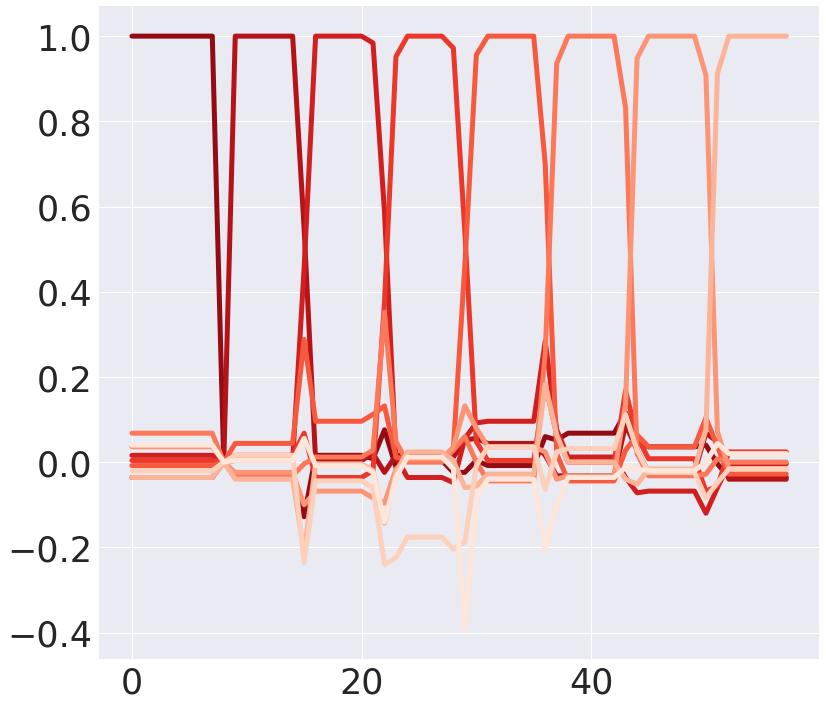

In [178]:
cmap = sns.color_palette("Reds_r", n_colors=n_patterns)

for index, overlap in enumerate(m.T):
    plt.plot(overlap, color=cmap[index], lw=5)

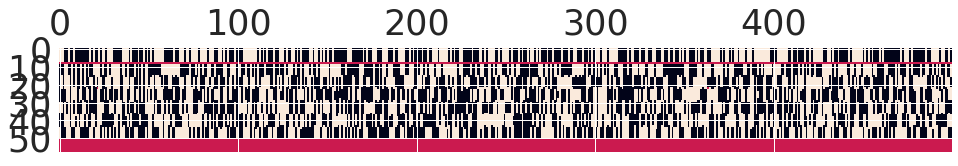

In [161]:
plt.matshow(S)

In [167]:
S[-4, ...]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0